In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab 
from random import *
import re

In [74]:
df=pd.read_excel("./TCP_datasets.xlsx")
df.shape

(325, 20)

In [75]:
#remove formula wordspace
def removespace(element):
    return element.replace(" ","")
df["Perovskite"]=df["Perovskite"].apply(removespace)
df.to_excel("./TCP_datasets.xlsx",index=False)

In [76]:
#remove formula parentheses
def process_string(input_string):
    def process_group(group):
        group_content = group.group(1)
        group_coefficient = float(group.group(2)) if group.group(2) else 1.0
        processed_content = re.sub(r'([A-Za-z])([0-9.]*)', 
                                   lambda x: f"{x.group(1)}{float(x.group(2)) * group_coefficient:.4g}" if x.group(2) else x.group(1),
                                   group_content)
        return f"({processed_content})"
    result = re.sub(r'\((.*?)\)([0-9.]*)', lambda x: process_group(x), input_string)
    return result
df["Perovskite"]=df["Perovskite"].apply(process_string)
df.head(5)

,Perovskite,bandgap(eV),glass,ETL,ETL-2,ETL \nthickness(um),HTL,HTL \nthickness(um),meta,Perovskite \ndeposition\n procedure,Perovskite\n deposition\n method,Anti-solvent \ntreatment,Precursor\n solution,Annealing\n temperature (°C),Annealing\n time (minutes),Jsc,Voc,FF,PCE,Article
0,Cs0.05(MA0.1615FA0.7885)Pb(I2.49Br0.51),1.60,FTO,TiO2,NaN,0.04,CuSbS2,0.100,Pt,two-step,spin,CB,"DMF, DMSO and NMP",100.0,60.0,22.68,1.14,0.7600,19.61,"Jaiswal, N., Singh, V.P., Kumari, D. and Pande..."
1,Cs0.05MA0.05FA0.9PbI3,NaN,FTO,c-TiO2,meso-TiO2,NaN,piro-OMeTAD,0.070,Au,two-step,spin,hlorobenzene,"DMF, DMSO",100.0,60.0,25.32,1.12,0.8370,23.76,"P. Dörflinger, Y. Ding, V. Schmid, M. Armer, R..."
2,Cs0.05MA0.05FA0.9PbI3,NaN,FTO,c-TiO2,meso-TiO2,NaN,piro-OMeTAD,0.070,Au,two-step,spin,hlorobenzene,"DMF, DMSOand[Dmmim]Cl",100.0,60.0,25.26,1.15,0.8400,24.46,"P. Dörflinger, Y. Ding, V. Schmid, M. Armer, R..."
3,Cs0.05(MA0.1615FA0.7885)Pb(I2.79Br0.21),1.55,Quartz/ITO,SnO2,NaN,NaN,P3HT,NaN,BCP,two-step,spin,CB,"DMF,DMSO",150.0,15.0,19.7,0.90,0.5700,10.70,"Yu Miyazawa, Gyu Min Kim, Ayumi Ishii, Masashi..."
4,Cs0.05(FA0.7885MA0.1615)Pb(I2.49Br0.51),1.62,ITO,SnO2,NaN,NaN,PTAA,0.017,Ag,two-step,spin,ANI,DMF:DMSO:NMP,100.0,40.0,20.33,1.01,0.8073,16.50,"P. K. Deendyal, S. Dhakla, H. Singh, A. Taya, ..."


In [77]:
#去除左右的括号
def removespace(element):
    return element.replace("(","").replace(")","")
df["Perovskite"]=df["Perovskite"].apply(removespace)


In [78]:
df.head(1)

,Perovskite,bandgap(eV),glass,ETL,ETL-2,ETL \nthickness(um),HTL,HTL \nthickness(um),meta,Perovskite \ndeposition\n procedure,Perovskite\n deposition\n method,Anti-solvent \ntreatment,Precursor\n solution,Annealing\n temperature (°C),Annealing\n time (minutes),Jsc,Voc,FF,PCE,Article
0,Cs0.05MA0.1615FA0.7885PbI2.49Br0.51,1.6,FTO,TiO2,NaN,0.04,CuSbS2,0.1,Pt,two-step,spin,CB,"DMF, DMSO and NMP",100.0,60.0,22.68,1.14,0.76,19.61,"Jaiswal, N., Singh, V.P., Kumari, D. and Pande..."


In [79]:
elements=[]
def calculate_cs_total(input_string):
    cs_pattern = re.compile(r'Cs([0-9.]*)')
    cs_matches = cs_pattern.findall(str(input_string))
    if not cs_matches:
        elements.append(0)
        return input_string
    cs_total = sum(float(coefficient) if coefficient else 1.0 for coefficient in cs_matches)
    elements.append(cs_total)
    return input_string
df["Perovskite"]=df["Perovskite"].apply(calculate_cs_total)
df["Cs"]=elements
elements=[]
def calculate_cs_total(input_string):
    cs_pattern = re.compile(r'FA([0-9.]*)')
    cs_matches = cs_pattern.findall(str(input_string))
    if not cs_matches:
        elements.append(0)
        return input_string
    cs_total = sum(float(coefficient) if coefficient else 1.0 for coefficient in cs_matches)
    elements.append(cs_total)
    return input_string
df["Perovskite"]=df["Perovskite"].apply(calculate_cs_total)
df["FA"]=elements

elements=[]
def calculate_cs_total(input_string):
    cs_pattern = re.compile(r'MA([0-9.]*)')
    cs_matches = cs_pattern.findall(str(input_string))
    if not cs_matches:
        elements.append(0)
        return input_string
    cs_total = sum(float(coefficient) if coefficient else 1.0 for coefficient in cs_matches)
    elements.append(cs_total)
    return input_string
df["Perovskite"]=df["Perovskite"].apply(calculate_cs_total)
df["MA"]=elements

elements=[]
def calculate_cs_total(input_string):
    cs_pattern = re.compile(r'Pb([0-9.]*)')
    cs_matches = cs_pattern.findall(str(input_string))
    if not cs_matches:
        elements.append(0)
        return input_string
    cs_total = sum(float(coefficient) if coefficient else 1.0 for coefficient in cs_matches)
    elements.append(cs_total)
    return input_string
df["Perovskite"]=df["Perovskite"].apply(calculate_cs_total)
df["Pb"]=elements

elements=[]
def calculate_cs_total(input_string):
    cs_pattern = re.compile(r'I([0-9.]*)')
    cs_matches = cs_pattern.findall(str(input_string))
    if not cs_matches:
        elements.append(0)
        return input_string
    cs_total = sum(float(coefficient) if coefficient else 1.0 for coefficient in cs_matches)
    elements.append(cs_total)
    return input_string
df["Perovskite"]=df["Perovskite"].apply(calculate_cs_total)
df["I"]=elements

elements=[]
def calculate_cs_total(input_string):
    cs_pattern = re.compile(r'Br([0-9.]*)')
    cs_matches = cs_pattern.findall(str(input_string))
    if not cs_matches:
        elements.append(0)
        return input_string
    cs_total = sum(float(coefficient) if coefficient else 1.0 for coefficient in cs_matches)
    elements.append(cs_total)
    return input_string
df["Perovskite"]=df["Perovskite"].apply(calculate_cs_total)
df["Br"]=elements

In [80]:
df.to_excel("./TCP_datasets.xlsx",index=False)

In [82]:
df=pd.read_excel("./TCP_datasets.xlsx")
df.shape

(325, 26)

In [95]:
#接下来是去除不恰当的数据，也就是不能够配平化合式的数据

condition = abs((df['Cs']+df['FA']+df['MA']+2*df['Pb'])-(df['I']+df['Br']))<0.2
df_filtered = df[condition]
df_filtered.to_excel('./TCP_datasets.xlsx', index=False)


PermissionError: [Errno 13] Permission denied: './TCP_datasets.xlsx'

In [93]:
df=df.drop('FA/MA',axis=1)
df=df.drop('I/Br',axis=1)

In [4]:
df=pd.read_excel("datasets/TCP_datasets.xlsx")
df.columns

Index(['Cs', 'FA', 'MA', 'Pb', 'I', 'Br', 'structure', 'bandgap', 'substrate',
       'ETL-1', 'ETL-2', 'HTL', 'electrode', 'depositionProcedure',
       'depositionMethod', 'Anti-solvent', 'PrecursorSolvent',
       'AnnealingTemperature', 'AnnealingTime', 'Jsc', 'Voc', 'FF', 'PCE',
       'Article', 'Unnamed: 24'],
      dtype='object')

In [5]:
df['Anti-solvent'].unique()

array([nan, 'EA', 'CB', 'isopropanol ', 'diethyl ether', 'GP', 'ANI ',
       'HEA', 'ANI', 'toluene', 'EA/HEX', 'tBuOH/EA', 'TL', 'T', 'EA/Hex',
       'BBr', 'BCl'], dtype=object)

In [8]:
df['Anti-solvent'] = df['Anti-solvent'].str.replace('T ', 'toluene')
# df['Anti-solvent'] = df['Anti-solvent'].str.replace('EA/Hex ', 'EA/HEX')
df.to_excel("datasets/TCP_datasets.xlsx",index=False)

In [9]:
df['depositionMethod'].unique()

array(['spin', 'Vacuum Deposited', 'R2R', 'coat', 'Inkjet-Printed',
       'CAGQ', 'VTA', 'VAC'], dtype=object)

In [2]:
import pandas as pd


In [3]:
dftcp=pd.read_excel("datasets/TCP_data.xlsx")
dftemp=pd.read_excel("datasets/temp.xlsx")

In [4]:
print(dftcp.shape)
dftemp.shape

(538, 21)


(538, 21)

In [7]:
dftcp=dftcp.drop("Pb",axis=1)
dftemp=dftemp.drop("Pb",axis=1)

In [8]:
dftcp.columns

Index(['Cs', 'FA', 'I', 'structure', 'bandgap', 'substrate', 'ETL-1', 'ETL-2',
       'HTL', 'electrode', 'depositionProcedure', 'depositionMethod',
       'Anti-solvent', 'PrecursorSolvent', 'AnnealingTemperature',
       'AnnealingTime', 'Jsc', 'Voc', 'FF', 'PCE'],
      dtype='object')

In [12]:
dftemp['AnnealingTemperature']=dftemp['AnnealingTemperature'].replace('unused',0)
dftcp['AnnealingTemperature']=dftcp['AnnealingTemperature'].replace('unused',0)

In [13]:
dftemp['AnnealingTemperature']=dftemp['AnnealingTemperature'].astype("float64")
dftcp['AnnealingTemperature']=dftcp['AnnealingTemperature'].astype("float64")

In [14]:
dftemp['AnnealingTime']=dftemp['AnnealingTime'].replace('unused',0)
dftcp['AnnealingTime']=dftcp['AnnealingTime'].replace('unused',0)
dftemp['AnnealingTime']=dftemp['AnnealingTime'].astype("float64")
dftcp['AnnealingTime']=dftcp['AnnealingTime'].astype("float64")

In [15]:
dftcp.columns

Index(['Cs', 'FA', 'I', 'structure', 'bandgap', 'substrate', 'ETL-1', 'ETL-2',
       'HTL', 'electrode', 'depositionProcedure', 'depositionMethod',
       'Anti-solvent', 'PrecursorSolvent', 'AnnealingTemperature',
       'AnnealingTime', 'Jsc', 'Voc', 'FF', 'PCE'],
      dtype='object')

In [18]:
dftcp['ETL-1'].unique()

array(['PCBM', 'SnO2', 'Li-TiO2', 'c-TiO2', 'ZnO', 'BCP', 'C', 'TiO2',
       'bl-TiO2', 'ZnO2', 'ALD-SnO2', 'ALD-TiO2', 'PlanarTiO2', 'mpTiO2',
       'CMC'], dtype=object)

In [17]:
dftcp['ETL-1']=dftcp['ETL-1'].replace('SnO3','SnO2')
dftcp['ETL-1']=dftcp['ETL-1'].replace('SnO4','SnO2')
dftcp['ETL-1']=dftcp['ETL-1'].replace('SnO5','SnO2')
dftcp['ETL-1']=dftcp['ETL-1'].replace('SnO6','SnO2')
dftemp['ETL-1']=dftemp['ETL-1'].replace('SnO3','SnO2')
dftemp['ETL-1']=dftemp['ETL-1'].replace('SnO4','SnO2')
dftemp['ETL-1']=dftemp['ETL-1'].replace('SnO5','SnO2')
dftemp['ETL-1']=dftemp['ETL-1'].replace('SnO6','SnO2')

In [19]:
dftcp['ETL-2'].unique()

array(['BCP', 'C', nan, 'SnO2', 'mp-TiO2', 'ZnO', 'PCBM', 'mp-TiO2/SnO2',
       'TiO2/BCP', 'Al2O3', 'Y-TiO2'], dtype=object)

In [20]:
dftcp['ETL-2']=dftcp['ETL-2'].replace("TiO2/BCP",'BCP')
dftemp['ETL-2']=dftemp['ETL-2'].replace("TiO2/BCP",'BCP')

In [22]:
dftcp['HTL'].unique()

array(['ployTPD:F4-TCNQ', 'spiro', 'PEDOT:PSS', 'P3HT', 'PTAA', '2PACz',
       'MeO-4PACz', 'NiOx', 'TBTA[6]H/TBPHTFSI', 'spiro/Gual',
       'NiOx/PTAA', 'TPFPB/spiro', 'TaTm', 'CuSCN', 'CuSbS2',
       'D4TBP/spiro', 'NiO', 'ClS', 'spiro/tBP/LiTFSI/FK209', 'TPB',
       'RCP–BTT/dopant', 'spiro/tBP/LiTFSI', 'spiro/F4-TCNQ', 'SnS',
       'PeRyLene/P3HT/MoO3', 'PTB7/dopant', 'P3HT/MoO3', nan, 'RCP–BTT',
       'PTB7', 'SAMs'], dtype=object)

In [23]:
dftcp['HTL']=dftcp['HTL'].replace("NiO",'NiOx')
dftemp['HTL']=dftemp['HTL'].replace("NiO",'NiOx')
dftcp['HTL']=dftcp['HTL'].replace("2PACz",'SAMs')
dftemp['HTL']=dftemp['HTL'].replace("2PACz",'SAMs')
dftcp['HTL']=dftcp['HTL'].replace("MeO-4PACz",'SAMs')
dftemp['HTL']=dftemp['HTL'].replace("MeO-4PACz",'SAMs')

In [25]:
dftcp.columns

Index(['Cs', 'FA', 'I', 'structure', 'bandgap', 'substrate', 'ETL-1', 'ETL-2',
       'HTL', 'electrode', 'depositionProcedure', 'depositionMethod',
       'Anti-solvent', 'PrecursorSolvent', 'AnnealingTemperature',
       'AnnealingTime', 'Jsc', 'Voc', 'FF', 'PCE'],
      dtype='object')

In [26]:
dftcp['electrode'].unique()

array(['Ag', 'Au', 'PEIE/Ag', 'Ca/Al', 'PEIE/Au', 'Cu', 'Al', nan, 'Pt',
       'Ca/Ag', 'C', 'BCP'], dtype=object)

In [27]:
dftcp['electrode']=dftcp['electrode'].replace("PEIE/Ag",'Ag')
dftemp['electrode']=dftemp['electrode'].replace("PEIE/Ag",'Ag')
dftcp['electrode']=dftcp['electrode'].replace("PEIE/Au",'Au')
dftemp['electrode']=dftemp['electrode'].replace("PEIE/Au",'Au')
dftcp['electrode']=dftcp['electrode'].replace("Ca/Al",'Al')
dftemp['electrode']=dftemp['electrode'].replace("Ca/Al",'Al')
dftcp['electrode']=dftcp['electrode'].replace("Ca/Ag",'Ag')
dftemp['electrode']=dftemp['electrode'].replace("Ca/Ag",'Ag')

In [28]:
dftcp['depositionProcedure'].unique()

array(['three-step', 'one-step', 'two-step'], dtype=object)

In [29]:
dftcp['depositionMethod'].unique()

array(['CAGQ', 'coat', 'Inkjet-Printed', 'R2R', 'spin',
       'Vacuum Deposited'], dtype=object)

In [30]:
dftcp['PrecursorSolvent'].unique()

array(['DMF/DMSO', 'DMF', 'DMSO/2BE', nan, 'DMF/DMSO/DmmimCl',
       'DMF/DMSO/GBL', 'DMF/DMSO/APL', 'DMF/DMSO/1.5APL',
       'DMF/DMSO/0.5APL', 'DMF/DMSO/EAI', 'DMF:DMSO:NMP', 'DMF/DMSO/TPL',
       'DMF/NMP', 'DMF/DMSO/NaF', 'DMF/DMSO/KSCN', 'DMF/DMSO/Pb(SCN)2',
       'DMF/DMSO/MF', 'DMF/DMSO/Ga(AcAc)3',
       'DMF/DMSO/4F-PEAI/Pb(SCN)2/Ga(AcAc)3', 'DMF/DMSO/3APL',
       'DMF/DMSO/IAI', 'DMF/DMSO/MASCN', 'DMF/DMSO/4F-PEAI/Pb(SCN)2',
       'DMF/DMSO/MACl', 'DMF/DMSO/RbI', 'DMSO', 'DCB', 'DMF/DMSO/KI',
       'DMF/DMSO/IPA', 'DMF/DMSO/Pr', 'DMF/DMSO/4F-PEAI',
       'DMF/DMSO/BMIM:BF4/4F-PEAI/Pb(SCN)2', 'DMF/DMSO/GuaI',
       'DMF/DMSO/BMIM:BF4', 'DMF/DMSO/EMIMCL', 'DMF/DMSO/BMIM:PF6',
       'GBL/DMF', 'DMF/DMSO/PA/4F-PEAI/Pb(SCN)2',
       'DMF/DMSO/BMIM:BF4/Ga(AcAc)3', 'DMF/DMSO/MWCNT-g-PDDT',
       'DMF/DMSO/EAI/IAI', 'DMF/DMSO/Y6', 'GBL/DMSO', 'DMF/DMSO/CsI',
       'DMF/DMSO/EAI/GuaI', 'DMF/DMSO/PA'], dtype=object)

In [31]:
dftcp['Anti-solvent'].unique()

array([nan, 'CB', 'BBr', 'BCl', 'tBuOH/EA', 'EA', 'isopropanol',
       'diethyl ether', 'GP', 'ANI', 'HEA', 'toluene', 'EA/HEX', 'CF'],
      dtype=object)

In [32]:
dftcp.to_excel("tcpUnData.xlsx",index=False)


In [33]:
dffill=pd.read_excel("tcpUnData.xlsx")

In [34]:
dffill['AnnealingTemperature']=dffill['AnnealingTemperature'].fillna(0)
dffill['AnnealingTime']=dffill['AnnealingTime'].fillna(0)
dffill=dffill.fillna("unused")

In [35]:
dffill.to_excel("tcpFillData.xlsx",index=False)

In [1]:
import pandas as pd
df=pd.read_excel("perovskite_combinations.xlsx")
df.shape

(184320, 16)

In [2]:


# 删除 Cs 和 FA 值之和大于 1 的行
df = df[df["Cs"] + df["FA"] <= 1]

# 保存到新的 Excel 文件
df.to_excel("perovskite_combinations.xlsx", index=False)
df.shape



(184320, 16)

AttributeError: module 'matplotlib.pyplot' has no attribute 'Ellipse'

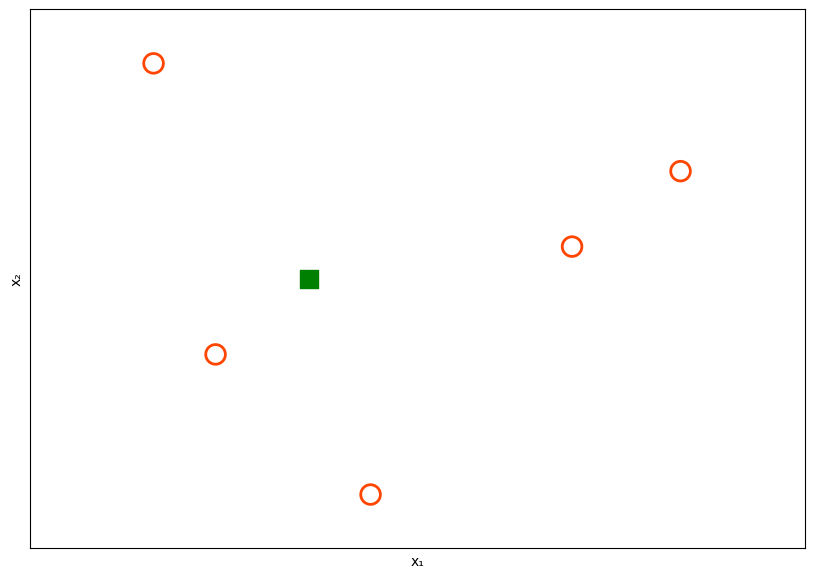

In [16]:
import matplotlib.pyplot as plt

# 创建数据点
orange_points = [(0.8, 4.5), (3.5, 2.8), (1.2, 1.8), (4.2, 3.5), (2.2, 0.5)]
green_point = (1.8, 2.5)

# 绘制坐标轴
plt.figure(figsize=(10, 7))  # 设置图像大小
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xticks([])  # 隐藏 x 轴刻度
plt.yticks([])  # 隐藏 y 轴刻度

# 绘制数据点
plt.scatter(*zip(*orange_points), s=200, facecolors='none', edgecolors='orangered', linewidth=2)
plt.scatter(*green_point, s=150, marker='s', color='green')

# 绘制椭圆
ellipse = plt.Ellipse((2, 2), 1.5, 1, edgecolor='gray', facecolor='none', linestyle='--')
plt.gca().add_patch(ellipse)

# 添加文本
plt.text(2.2, 1, "3 - Nearest Neighbours of the green data point", fontsize=12)

# 显示图像
plt.show()


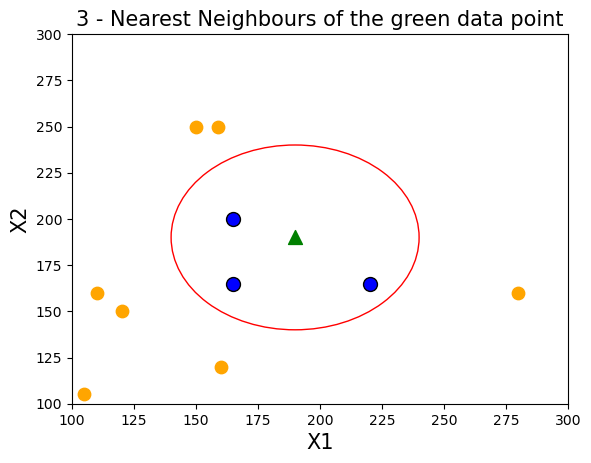

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# 自定义数据点
x1 = np.array([120, 150, 165, 220, 165, 159, 280, 160, 110, 105])
x2 = np.array([150, 250, 200, 165, 165, 250, 160, 120, 160, 105])

# 特定的数据点
special_point = (190, 190)

# 找到最近的三个邻居
distances = np.sqrt((x1 - special_point[0])**2 + (x2 - special_point[1])**2)
nearest_neighbors_indices = distances.argsort()[:3]

# 创建散点图
plt.scatter(x1, x2, color='orange', label='数据点',s=80)
plt.scatter(*special_point, color='green', marker='^',label='特定数据点', s=100)

# 标记最近的三个邻居
for neighbor_index in nearest_neighbors_indices:
    plt.scatter(x1[neighbor_index], x2[neighbor_index], color='blue', s=100, edgecolor='black')

# 画出最近邻居的椭圆
ellipse = plt.Circle(special_point, 50, color='red', fill=False)  # 调整椭圆大小
plt.gca().add_patch(ellipse)


# 设置坐标轴范围
plt.xlim(100, 300)
plt.ylim(100, 300)

# 添加标签和标题
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)
plt.title('3 - Nearest Neighbours of the green data point', fontsize=15)

# 显示图表
plt.show()

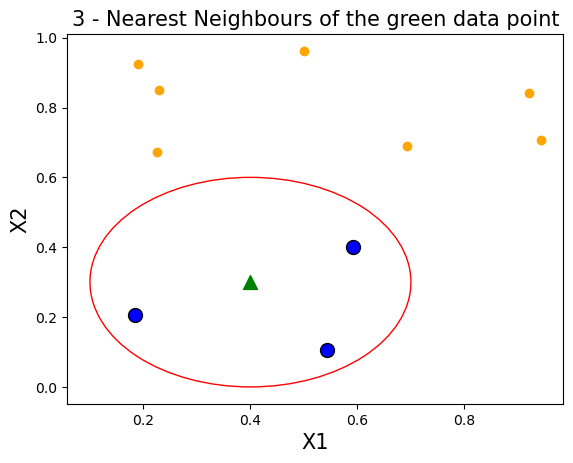

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# 假设的数据点
x1 = np.random.rand(10)
x2 = np.random.rand(10)

# 特定的数据点
special_point = (0.4, 0.3)

# 找到最近的三个邻居
distances = np.sqrt((x1 - special_point[0])**2 + (x2 - special_point[1])**2)
nearest_neighbors_indices = distances.argsort()[:3]

# 创建散点图
plt.scatter(x1, x2, color='orange', label='数据点')
plt.scatter(*special_point, color='green', marker='^',label='特定数据点', s=100)

# 标记最近的三个邻居
for neighbor_index in nearest_neighbors_indices:
    plt.scatter(x1[neighbor_index], x2[neighbor_index], color='blue', s=100, edgecolor='black')

# 画出最近邻居的椭圆
ellipse = plt.Circle(special_point, 0.3, color='red', fill=False)
plt.gca().add_patch(ellipse)

# 添加图例和标签
# plt.legend()
plt.xlabel('X1',fontsize=15)
plt.ylabel('X2',fontsize=15)
plt.title('3 - Nearest Neighbours of the green data point',fontsize=15)

# 显示图表
plt.show()


In [2]:
import pandas as pd

df = pd.read_excel("datasets\datasets.xlsx")
# 使用apply()函数和lambda函数来进行条件判断和合并
df['ETL-1'] = df.apply(lambda row: f"{row['ETL-1']}/{row['ETL-2']}" if pd.notnull(row['ETL-2']) and row['ETL-2'] != '' else row['ETL-1'], axis=1)

# 删除不再需要的ETL-2列
df.drop('ETL-2', axis=1, inplace=True)

# 改变列名 'ETL-1' 为 'ETL'
df.rename(columns={'ETL-1': 'ETL'}, inplace=True)


In [5]:
df.to_excel("TCP_dataset.xlsx",index=False)

In [3]:
import pandas as pd
df=pd.read_excel("datasets\TCP_dataset.xlsx")

In [5]:
df['ETL'].unique()

array(['ALD-SnO2', 'ALD-TiO2', 'ALD-TiO2/mp-TiO2', 'BCP/C',
       'bl-TiO2/mp-TiO2', 'C', 'CMC/BCP', 'c-TiO2', 'c-TiO2/mp-TiO2',
       'c-TiO2/mp-TiO2/SnO2', 'c-TiO2/SnO2', 'Li-TiO2', 'mpTiO2', 'PCBM',
       'PCBM/BCP', 'PCBM/C', 'PCBM/C/BCP', 'PCBM/C/SnOx', 'PCBM/ZnO',
       'PlanarTiO2', 'SnO2', 'SnO2/Al2O3', 'SnO2/C', 'SnO2/PCBM', 'TiO2',
       'TiO2/Al2O3', 'TiO2/Y-TiO2', 'ZnO', 'ZnO2'], dtype=object)

In [6]:
df['one_etl']=0

In [7]:
4.76
3.81
4.075
4.562
4.659
4.656
4.0875

Index(['Cs', 'FA', 'MA', 'Pb', 'I', 'Br', 'structure', 'bandgap', 'substrate',
       'ETL', 'HTL', 'electrode', 'depositionProcedure', 'depositionMethod',
       'Anti-solvent', 'PrecursorSolvent', 'AnnealingTemperature',
       'AnnealingTime', 'Jsc', 'Voc', 'FF', 'PCE', 'Article', 'Unnamed: 24',
       'one_etl'],
      dtype='object')

In [8]:
data=pd.read_excel("datasets/bandgap_datasets.xlsx")
data.columns

Index(['Cs', 'FA', 'MA', 'I', 'Br', 'bandgap'], dtype='object')

In [9]:
i_sum = data['I'].sum()

# 计算I列的数据的平方和
i_sum_of_squares = (data['I']**2).sum()

# 计算BG列的数据和
bg_sum = data['bandgap'].sum()

# 计算BG列的数据的平方和
bg_sum_of_squares = (data['bandgap']**2).sum()

# 计算I和BG列数据对应相乘的和
product_sum = (data['I'] * data['bandgap']).sum()

# 输出结果
print(f"I列的和为: {i_sum}")
print(f"I列的平方和为: {i_sum_of_squares}")
print(f"BG列的和为: {bg_sum}")
print(f"BG列的平方和为: {bg_sum_of_squares}")
print(f"I和BG列对应相乘的和为: {product_sum}")

I列的和为: 2048.995
I列的平方和为: 5295.456735000001
BG列的和为: 1445.6435000000001
BG列的平方和为: 2447.2713352500004
I和BG列对应相乘的和为: 3342.5273159999997


In [53]:
import pandas as pd
df=pd.read_excel("datasets/TCP_dataset.xlsx")
df.shape

(595, 24)

In [54]:

df.columns

Index(['Cs', 'FA', 'MA', 'Pb', 'I', 'Br', 'structure', 'bandgap', 'substrate',
       'ETL', 'HTL', 'electrode', 'depositionProcedure', 'depositionMethod',
       'Anti-solvent', 'PrecursorSolvent', 'AnnealingTemperature',
       'AnnealingTime', 'Jsc', 'Voc', 'FF', 'PCE', 'Article', 'Unnamed: 24'],
      dtype='object')

In [56]:
df=df.drop("MA",axis=1)
df=df.drop("Pb",axis=1)
df=df.drop("Br",axis=1)
df=df.drop("Article",axis=1)
df=df.drop("Unnamed: 24",axis=1)

In [57]:
df.shape

(595, 19)

In [58]:
df.columns

Index(['Cs', 'FA', 'I', 'structure', 'bandgap', 'substrate', 'ETL', 'HTL',
       'electrode', 'depositionProcedure', 'depositionMethod', 'Anti-solvent',
       'PrecursorSolvent', 'AnnealingTemperature', 'AnnealingTime', 'Jsc',
       'Voc', 'FF', 'PCE'],
      dtype='object')

In [59]:
df=df.drop("Jsc",axis=1)
df=df.drop("Voc",axis=1)
df=df.drop("FF",axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cs                    595 non-null    float64
 1   FA                    595 non-null    float64
 2   I                     595 non-null    float64
 3   structure             595 non-null    int64  
 4   bandgap               595 non-null    object 
 5   substrate             595 non-null    object 
 6   ETL                   595 non-null    object 
 7   HTL                   583 non-null    object 
 8   electrode             594 non-null    object 
 9   depositionProcedure   595 non-null    object 
 10  depositionMethod      595 non-null    object 
 11  Anti-solvent          417 non-null    object 
 12  PrecursorSolvent      587 non-null    object 
 13  AnnealingTemperature  583 non-null    float64
 14  AnnealingTime         583 non-null    float64
 15  PCE                   5

In [60]:
df['bandgap']=df['bandgap'].astype("float64")
df['PCE']=df['PCE'].astype("float64")

In [61]:
df["AnnealingTemperature"]=df["AnnealingTemperature"].fillna(20)
df["AnnealingTime"]=df["AnnealingTime"].fillna(0)

In [62]:
df.to_excel("dataUnfilled.xlsx",index=False)


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cs                    595 non-null    float64
 1   FA                    595 non-null    float64
 2   I                     595 non-null    float64
 3   structure             595 non-null    int64  
 4   bandgap               595 non-null    float64
 5   substrate             595 non-null    object 
 6   ETL                   595 non-null    object 
 7   HTL                   583 non-null    object 
 8   electrode             594 non-null    object 
 9   depositionProcedure   595 non-null    object 
 10  depositionMethod      595 non-null    object 
 11  Anti-solvent          417 non-null    object 
 12  PrecursorSolvent      587 non-null    object 
 13  AnnealingTemperature  595 non-null    float64
 14  AnnealingTime         595 non-null    float64
 15  PCE                   5

In [64]:
df=df.fillna("unused")
df.to_excel("dataFilled.xlsx",index=False)